In [181]:
import numpy as np
import pylab as pl

import os
import json
s = json.load( open("../fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [182]:
def myregression(x, y, method=None):
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    if method == 'W':
        rm = sm.WLS(y, x)
    reg = rm.fit()
    print "linear regression slope {}".format(reg.summary())
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.868e+31
Date:                Sun, 04 Oct 2015   Prob (F-statistic):               0.00
Time:                        19:58:13   Log-Likelihood:                 2925.2
No. Observations:                 100   AIC:                            -5848.
Df Residuals:                      99   BIC:                            -5846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7000   7.89

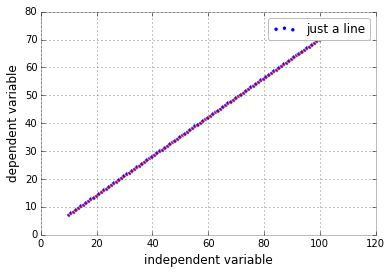

In [183]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)
mrold = myregression(x, y)
mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
pl.scatter(x, y, label = "just a line")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5)
pl.legend()


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.524e+05
Date:                Sun, 04 Oct 2015   Prob (F-statistic):          1.88e-170
Time:                        19:58:13   Log-Likelihood:                -127.61
No. Observations:                 100   AIC:                             257.2
Df Residuals:                      99   BIC:                             259.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7183      0

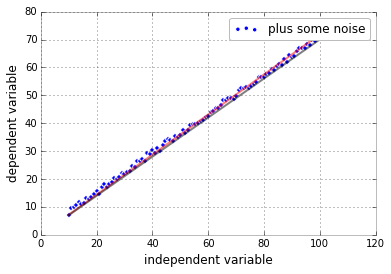

In [184]:
y = y+np.random.rand(100)*2.5
mrold = mrnew
mrnew = myregression(x, y)

pl.scatter(x, y, label = "plus some noise")
pl.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5)
pl.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5)
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.650e+04
Date:                Sun, 04 Oct 2015   Prob (F-statistic):          4.01e-134
Time:                        19:58:13   Log-Likelihood:                -217.25
No. Observations:                 100   AIC:                             436.5
Df Residuals:                      99   BIC:                             439.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7555      0

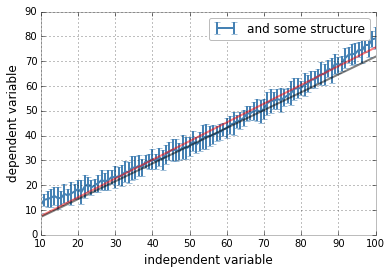

In [185]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y+3e-3*((x-50)**2)
mrold = mrnew
mrnew = myregression(x, y, method='W')

e = np.random.rand(100)*2.5+2.5
pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5)
pl.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5)
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()


7.39222786531
21.2447744739


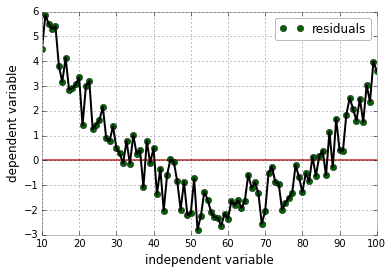

In [186]:
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')
pl.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
pl.plot(x, y-mrnew.predict(x), 'k-')
print mean(y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)))
print np.sqrt(sum((y-mrnew.predict(x))**2))
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

-3.7568300362
38.2030502027


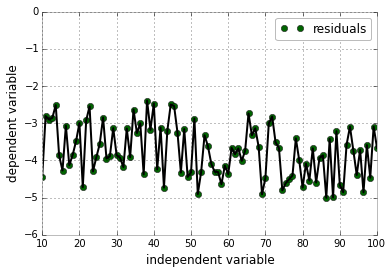

In [187]:
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')
pl.plot(x, y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)), 'o', color='DarkGreen', label='residuals')
pl.plot(x, y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)), 'k-')
print mean(y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)))
print np.sqrt(sum((y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)))**2))
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

3.30580007812e-14
1.81818593057e-06


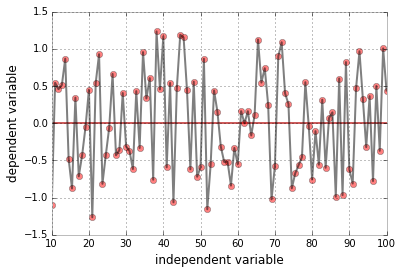

In [198]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)), 'ro', alpha=0.5)
pl.plot(x, y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)), 'k', alpha=0.5)
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()
print mean(y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))
print np.sqrt(sum((y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))))
